*IMPORTING IMPORTANT LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*IMPORTING DATASET*

In [7]:
df = pd.read_csv("advertising.csv.xls")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


*Aim:- Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.*



> Given dataset consist of the advertising platform and the related sales.Let's visulalize each platform



In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000



**Basic Observation**

---
> Avg expense spend is highest on TV


> Avg expense spend is lowest on Radio


> Max sale is 27 and min is 1.6







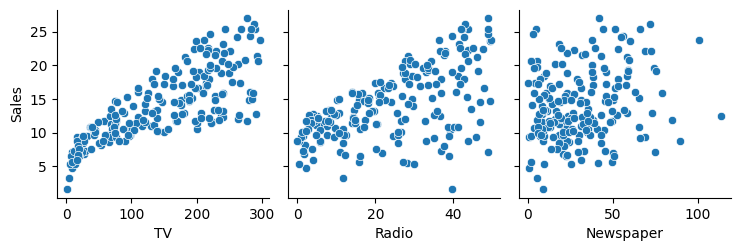

In [10]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()


Pair Plot Observation


---
When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.


<Axes: ylabel='Frequency'>

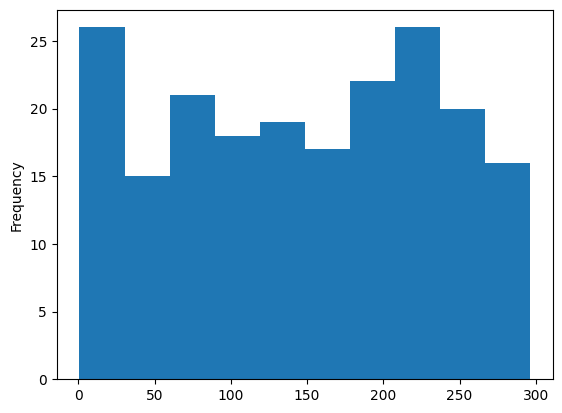

In [11]:
df['TV'].plot.hist(bins=10)


<Axes: xlabel='Radio', ylabel='Frequency'>

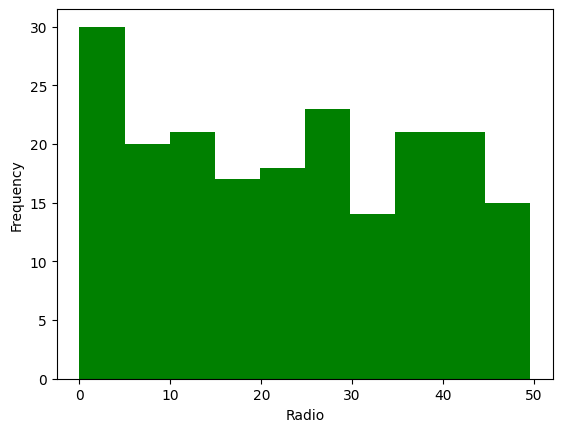

In [12]:
df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

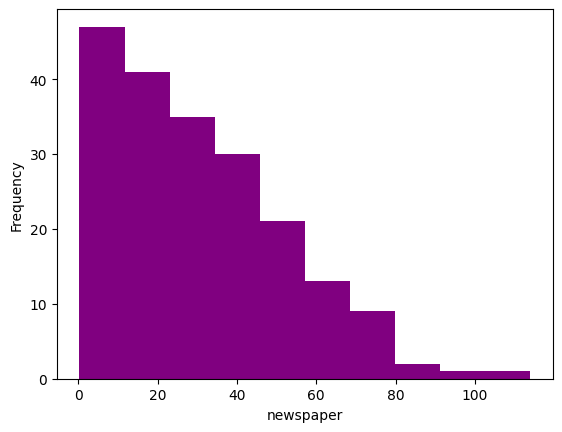

In [13]:
df['Newspaper'].plot.hist(bins=10,color="purple", xlabel="newspaper")

Histogram Observation


---

*The majority sales is the result of low advertising cost in newspaper*

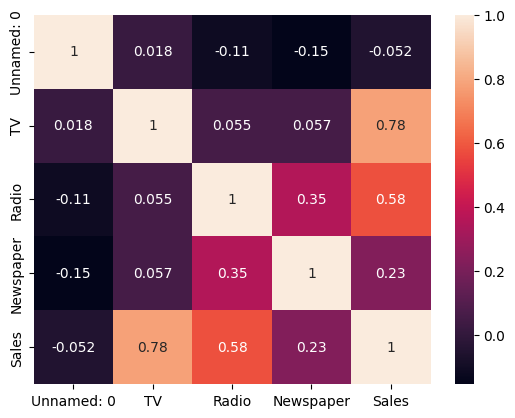

In [14]:
sns.heatmap(df.corr(),annot = True)
plt.show()

**SALES IS HIGHLY COORELATED WITH THE TV**

Lets train our model using linear regression as it is coorelated with only one variable TV

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3,random_state=0)

In [16]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [17]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [18]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [19]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
res= model.predict(X_test)
print(res)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [22]:
model.coef_

array([[0.04581434]])

In [23]:
model.intercept_

array([7.31081017])

In [24]:
0.05473199* 69.2 + 7.14382225

10.931275958

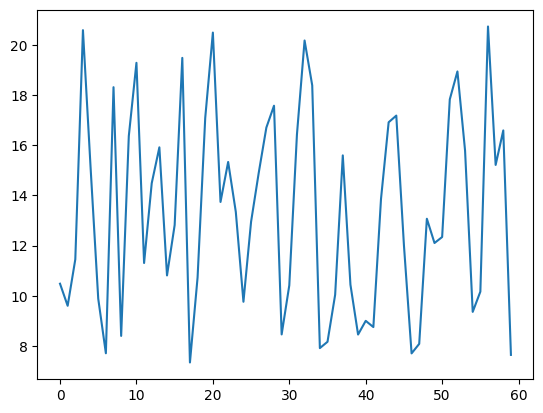

In [25]:
plt.plot(res)

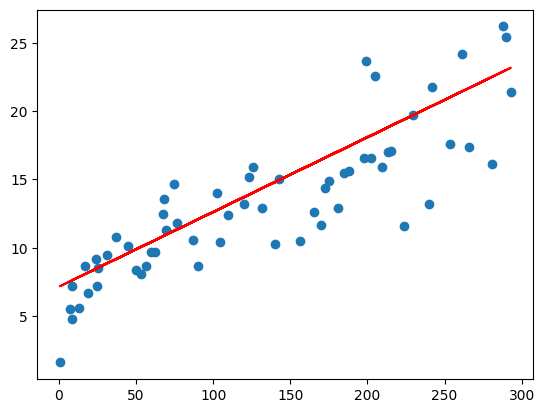

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()

***Concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets***